# 1. 配置环境

In [1]:
import os
import numpy as np
import keras as k
np.random.seed(2018)
from keras.optimizers import *
from keras.preprocessing.image import ImageDataGenerator

from keras import models
from keras import layers
from keras import initializers

from keras import optimizers
from keras.callbacks import EarlyStopping

from keras.models import load_model

import os ,glob
from keras.preprocessing import image

from matplotlib.font_manager import FontProperties 
import matplotlib.pyplot as plt
print("import done !")

Using TensorFlow backend.


import done !


# 2. 载入数据

In [2]:
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(directory = '../data/tf_car_license_dataset/train_images/training-set/chinese-characters/', 
                                                  target_size = (32,40),
                                                  batch_size = 60
                                                    )
valid_generator = valid_datagen.flow_from_directory(directory='../data/tf_car_license_dataset/train_images/validation-set/chinese-characters/',
                                                   target_size = (32,40),
                                                   batch_size = 60)


Found 1254 images belonging to 6 classes.
Found 32 images belonging to 6 classes.


# 3. 卷积网络

In [3]:
model = models.Sequential()
# keras.layers.Conv2D(filters, kernel_size, strides=(1, 1), 
# padding='valid', data_format=None, dilation_rate=(1, 1), 
# activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None)

model.add(layers.Conv2D(16,(8,8),activation='relu',padding='same',
                        kernel_initializer=initializers.TruncatedNormal(stddev=0.1),
                        bias_initializer = initializers.Constant(value=0.1),
                        input_shape=(32,40,3))
                       )
model.add(layers.MaxPooling2D((2,2),strides=(2,2)))

model.add(layers.Conv2D(32,(5,5),activation='relu',padding='same',
                        kernel_initializer=initializers.TruncatedNormal(stddev=0.1),
                        bias_initializer = initializers.Constant(value=0.1))
                       )

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu',
        kernel_initializer=initializers.TruncatedNormal(stddev=0.1),
        bias_initializer = initializers.Constant(value=0.1)))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(6,activation='softmax',
        kernel_initializer=initializers.TruncatedNormal(stddev=0.1),
        bias_initializer = initializers.Constant(value=0.1)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 40, 16)        3088      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 20, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 20, 32)        12832     
_________________________________________________________________
flatten_1 (Flatten)          (None, 10240)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               5243392   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 3078      
Total para

# 4. 配置优化器并训练

In [4]:
adam = optimizers.Adam(lr = 0.001) 
def train():
    model.compile(optimizer=adam,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    stopcallback = [EarlyStopping(monitor='val_loss', patience=0, verbose=0, mode='auto')]

    #训练阶段
    print('Training ------------')
    model.fit_generator(train_generator,
                       steps_per_epoch =32,
                        epochs = 100,
                        validation_data = valid_generator,
                        validation_steps = 50,
                       callbacks=stopcallback)

    model.save('provinces.h5')

In [5]:
# train()

# 5 测试


Testing ------------


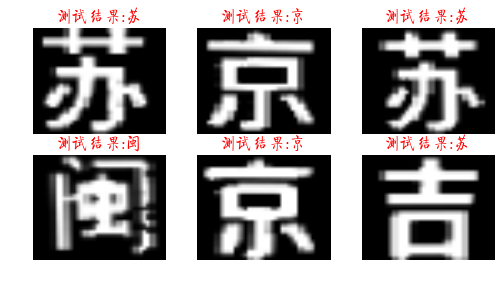

In [11]:
%matplotlib inline

font_set = FontProperties(fname=r"font.TTF", size=12)

model_test = load_model('provinces.h5')

def rescaleimg(imgarray):
    return imgarray/255.0

imagepath = []
PROVINCES = ("京","闽","粤","苏","沪","浙")
for files in glob.glob("../data/tf_car_license_dataset/test_images/characterChinese/*"):
    imagepath.append(files)
plt.figure(figsize=(6,3))
print('\nTesting ------------')
for i,img in enumerate(imagepath):
    img = image.load_img(img,target_size=(32,40))
    # 图像预处理
    x = image.img_to_array(img)
    x = rescaleimg(x)
    plt.subplot(2,3,i+1)
    plt.imshow(x)
    plt.axis('off')
    x = np.expand_dims(x, axis=0)
    pred = model_test.predict_classes(x)
    res = (PROVINCES[pred[0]])
    plt.title("测试结果:"+res,color = "red",fontproperties=font_set)
plt.show()
#plt.savefig("res.png",bbox_inches='tight')